# European Artist Bank - Computer-Vison Proof of concept.

### Table of contents

1. Model Catalog

2. Utility Functions

3. Image Preparation

4. Inference on Images

5. Results Dashboard

6. Summarize Answers


#### The entire workflow operates inside European infrastructure in Germany.

This Jupyter notebook performs image classification using multiple vision AI models via an OpenAI-compatible API hosted in a German data center. It encodes two local images, sends them to each model for analysis, and collects detailed descriptions. The results are displayed in a dashboard for visual and text comparison.

In [37]:
# 📌  – Model catalog

import json
from openai import OpenAI

# Initialize API client (endpoint hosted in Germany)
client = OpenAI(
    api_key="xxxxxxxxxxxxxxxxxxxxxxxxxxx",
    base_url="https://xxxxxxxxxxxxxxxx/v1",
)

# Retrieve model list
response = client.models.list()
model_data = [m.dict() for m in response.data]

# Pretty‑print catalog
print("📋 Available models:\n")
for m in model_data:
    model_id = m.get("id", "Unbekannt")
    created = m.get("created", "")
    capabilities = m.get("capabilities", [])
    print(f"🔹 Modell: {model_id}")
    if capabilities:
        print(f"   ➤ Fähigkeiten: {', '.join(capabilities)}")
    # created timestamp kept available if needed
    print()


📋 Available models:

🔹 Modell: meta-llama-3.1-8b-instruct

🔹 Modell: gemma-3-27b-it

🔹 Modell: qwen3-32b

🔹 Modell: qwen3-235b-a22b

🔹 Modell: llama-3.3-70b-instruct

🔹 Modell: qwen2.5-vl-72b-instruct

🔹 Modell: qwq-32b

🔹 Modell: deepseek-r1

🔹 Modell: deepseek-r1-distill-llama-70b

🔹 Modell: mistral-large-instruct

🔹 Modell: qwen2.5-coder-32b-instruct

🔹 Modell: internvl2.5-8b

🔹 Modell: codestral-22b

🔹 Modell: llama-3.1-sauerkrautlm-70b-instruct

🔹 Modell: meta-llama-3.1-8b-rag



In [39]:
# 📌 main

import base64

# Encode image as Base‑64 string -------------------------------
def encode_image(path: str) -> str:
    """Return Base‑64 representation of the image located at *path*."""
    with open(path, "rb") as img:
        return base64.b64encode(img.read()).decode()

# Send an image‑analysis request to a specific model -----------
def classify_image_with_model(image_b64: str, model: str) -> str:
    """Query *model* with an image and return the textual description."""
    response = client.chat.completions.create(
        model=model,
        messages=[
            {
                "role": "system",
                "content": (
                    "You are an image analysis system. "
                    "Describe the central object in detail: shape, texture, color, material."
                ),
            },
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": "What is visible in this image?"},
                    {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{image_b64}"}},
                ],
            },
        ],
    )
    return response.choices[0].message.content


Two local JPEG files are loaded, encoded, and stored as strings suitable for API transport. Each encoded image is then supplied to three vision‑enabled models—InternVL 2.5‑8B, Qwen 2.5‑VL‑72B‑Instruct, and Gemma‑3‑27B‑IT. For every model call, a system prompt requests a detailed description of the primary object’s shape, texture, color, and material, and the resulting text is collected.

In [40]:
# 📌 – Image preparation

# Vision‑enabled models (manually curated)
vision_models = [
    "internvl2.5-8b",
    "qwen2.5-vl-72b-instruct",
    "gemma-3-27b-it",
]

# Local image paths
image1_path = "1.jpg"
image2_path = "2.jpg"

# Encode images
image1_b64 = encode_image(image1_path)
image2_b64 = encode_image(image2_path)

print("✅ Images encoded.")


✅ Images encoded.


In [46]:
# 📌 – Image preparation

# Vision‑enabled models (manually curated)
vision_models = [
    "internvl2.5-8b",
    "qwen2.5-vl-72b-instruct",
    "gemma-3-27b-it",
]

# Local image paths
image1_path = "1.jpg"
image2_path = "2.jpg"

# Encode images
image1_b64 = encode_image(image1_path)
image2_b64 = encode_image(image2_path)

print("✅ Images encoded.")


✅ Images encoded.


In [42]:
# 📌  Inference on Image 1

desc1 = {}
for model in vision_models:
    print(f"🔄 Ask Vision-Modell: {model}")
    desc1[model] = classify_image_with_model(image1_b64, model)

print("✅ Image 1 – all models processed.")


🔄 Ask Vision-Modell: internvl2.5-8b
🔄 Ask Vision-Modell: qwen2.5-vl-72b-instruct
🔄 Ask Vision-Modell: gemma-3-27b-it
✅ Image 1 – all models processed.


In [43]:
# 📌  Inference on Image 2

desc2 = {}
for model in vision_models:
    print(f"🔄 Anfrage an Modell: {model}")
    desc2[model] = classify_image_with_model(image2_b64, model)

print("✅ Image 2 – all models processed.")


🔄 Anfrage an Modell: internvl2.5-8b
🔄 Anfrage an Modell: qwen2.5-vl-72b-instruct
🔄 Anfrage an Modell: gemma-3-27b-it
✅ Image 2 – all models processed.


A custom HTML dashboard renders both images side by side and lists the individual model responses beneath each photo, allowing direct comparison of descriptive accuracy.


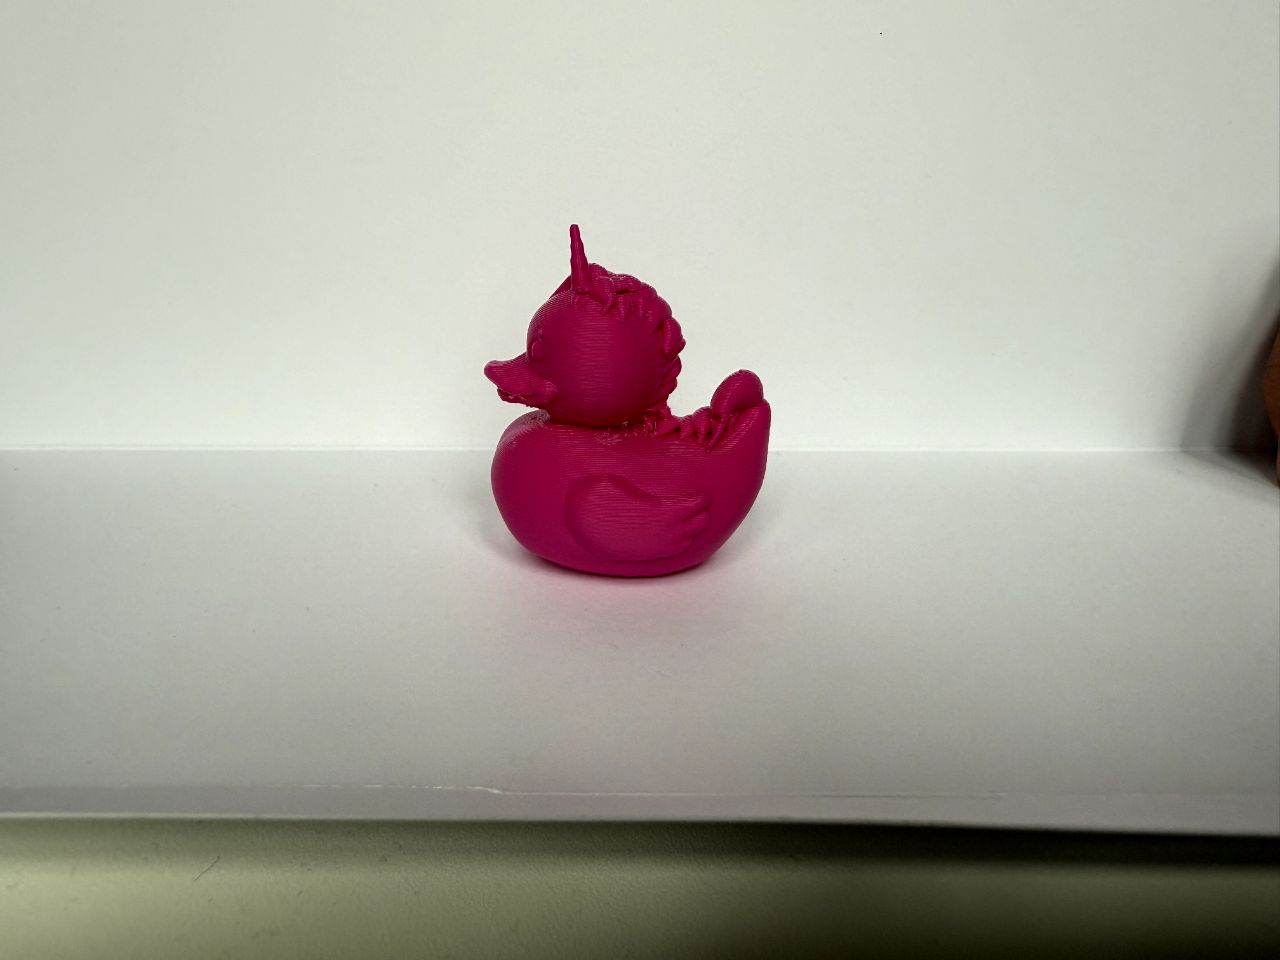
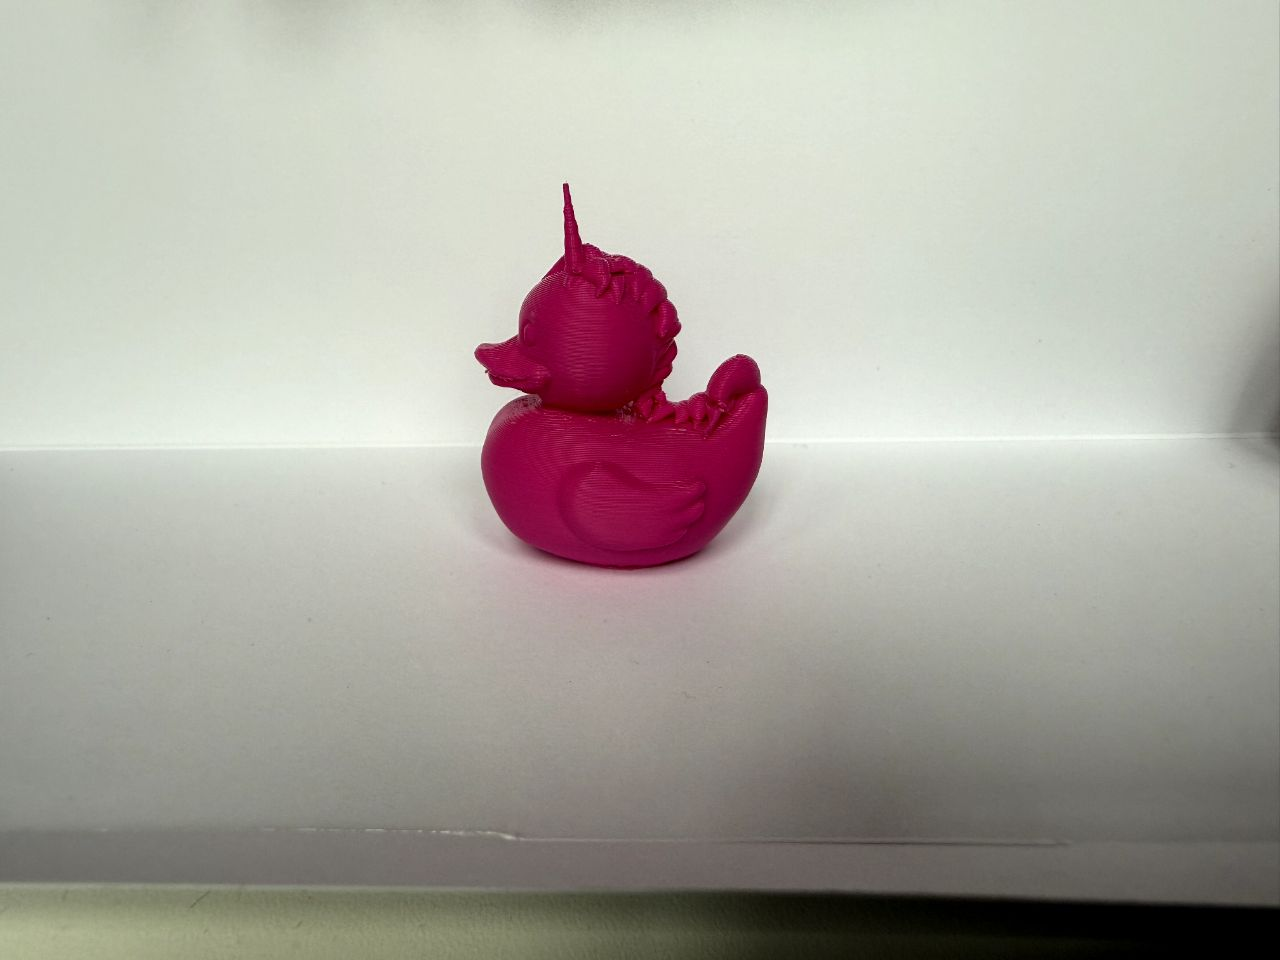

In [48]:
# 📌  Results-Dashboard

import markdown
from IPython.display import HTML, display

# Convert Markdown text to HTML
def render_markdown(text: str) -> str:
    return markdown.markdown(text, extensions=["extra"])

# Construct HTML page
html_output = f"""
<style>
.container {{
    display: flex;
    gap: 40px;
    justify-content: center;
    align-items: flex-start;
    margin-top: 20px;
}}
.image-box {{
    width: 45%;
}}
.image-box img {{
    max-width: 100%;
    border: 1px solid #ccc;
}}
.model-response {{
    background: #f9f9f9;
    padding: 10px;
    margin-top: 10px;
    margin-bottom: 20px;
    border-left: 4px solid #888;
}}
</style>

<div class="container">

  <div class="image-box">
    <h2>🖼️ IMG 1: {image1_path}</h2>
    <img src="data:image/jpeg;base64,{image1_b64}" alt="Bild 1">
"""

# Append model responses for Image 1
for model in vision_models:
    html_output += f"""
    <h4>🔍 Analysed <code>{model}</code>:</h4>
    <div class="model-response">{render_markdown(desc1[model])}</div>
    """

# Start column 2
html_output += f"""
  </div>

  <div class="image-box">
    <h2>🖼️ IMG 2: {image2_path}</h2>
    <img src="data:image/jpeg;base64,{image2_b64}" alt="Bild 2">
"""

# Append model responses for Image 2
for model in vision_models:
    html_output += f"""
    <h4>🔍 Analysed <code>{model}</code>:</h4>
    <div class="model-response">{render_markdown(desc2[model])}</div>
    """

# Finalize and display HTML
html_output += "</div></div>"
display(HTML(html_output))


In [50]:
# 📌  Summaries with LLaMA 8B
# Goal: Merge the individual model descriptions into one concise paragraph per image
#       and render the results underneath the existing dashboard.

from openai import OpenAI
from IPython.display import HTML, display
import markdown


summary_client = OpenAI(
    api_key="xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx",
    base_url="https://xxxxxxxxxxxxxxxxxxxxxxxxxxx.de/v1",
)


def summarize_descriptions(descriptions: dict, image_label: str) -> str:
    """
    Aggregate every model description for one image and ask LLaMA 8B to condense
    the information into a single, fluent paragraph.
    """
    prompt = (
        f"The following are image descriptions generated by different AI models for {image_label}.\n"
        "Please summarise the central object, merging all perspectives into one concise paragraph.\n\n"
    )
    for model, desc in descriptions.items():
        prompt += f"[{model}]: {desc}\n\n"

    response = summary_client.chat.completions.create(
        model="meta-llama-3.1-8b-instruct",
        messages=[
            {"role": "system", "content": "You are a summarisation model."},
            {"role": "user",   "content": prompt}
        ]
    )
    return response.choices[0].message.content.strip()

# ----------   Create summaries for both images ----------
summary_image1 = summarize_descriptions(desc1, "Image 1")
summary_image2 = summarize_descriptions(desc2, "Image 2")

# ----------   Render summaries beneath the dashboard ----------
def render_markdown(text: str) -> str:
    """Convert Markdown to HTML for display."""
    return markdown.markdown(text, extensions=["extra"])

html_summary = f"""
<style>
.summary-box {{
    display: flex;
    gap: 40px;
    justify-content: center;
    align-items: flex-start;
    margin-top: 20px;
}}
.summary-item {{
    width: 45%;
    background: #f3f3f9;
    padding: 16px;
    border-left: 4px solid #4b9fea;
}}
</style>

<div class="summary-box">
  <div class="summary-item">
    <h3>🧠Summary – Image 1</h3>
    {render_markdown(summary_image1)}
  </div>
  <div class="summary-item">
    <h3>🧠 Summary – Image 2</h3>
    {render_markdown(summary_image2)}
  </div>
</div>
"""

display(HTML(html_summary))
